# Time Series Analysis of Emergency Room (ER) Visits

This project forecasts daily emergency room visits at an Iowa hospital (Jan 2014–Aug 2017) using time series analysis. After conducting exploratory data analysis and identifying seasonal and periodic patterns, predictive models were developed and compared for accuracy using mean absolute percentage error (MAPE). Data was sourced from Choudhury & Urena (2020).

- Choudhury, Avishek & Urena, Estefania. (2020). *Forecasting hourly emergency department arrival using time series analysis.*  
  *British Journal of Healthcare Management, 26,* 34–43. https://doi.org/10.12968/bjhc.2019.0067

## Loading and visualizing the data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1400 entries, 2014-01-01 to 2017-10-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Arrivals  1400 non-null   int64
dtypes: int64(1)
memory usage: 21.9 KB


None

,Arrivals
count,1400.000000
mean,100.077857
std,15.734268
min,54.000000
25%,89.000000
50%,99.000000
75%,111.000000
max,153.000000


,Arrivals
Date,
2014-01-01,90
2014-01-02,97
2014-01-03,80
2014-01-04,92
2014-01-05,76


,Arrivals
Date,
2017-10-27,108
2017-10-28,108
2017-10-29,113
2017-10-30,124
2017-10-31,95


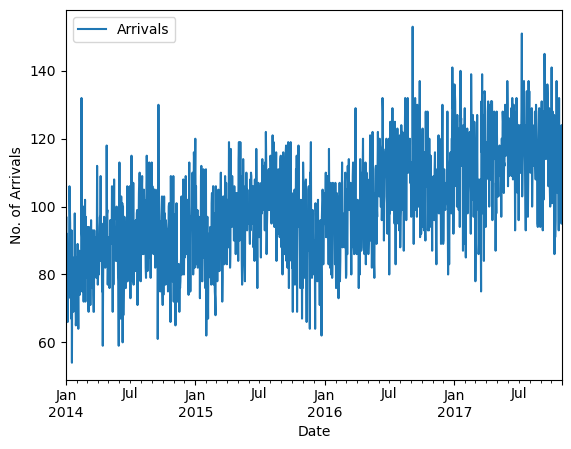

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

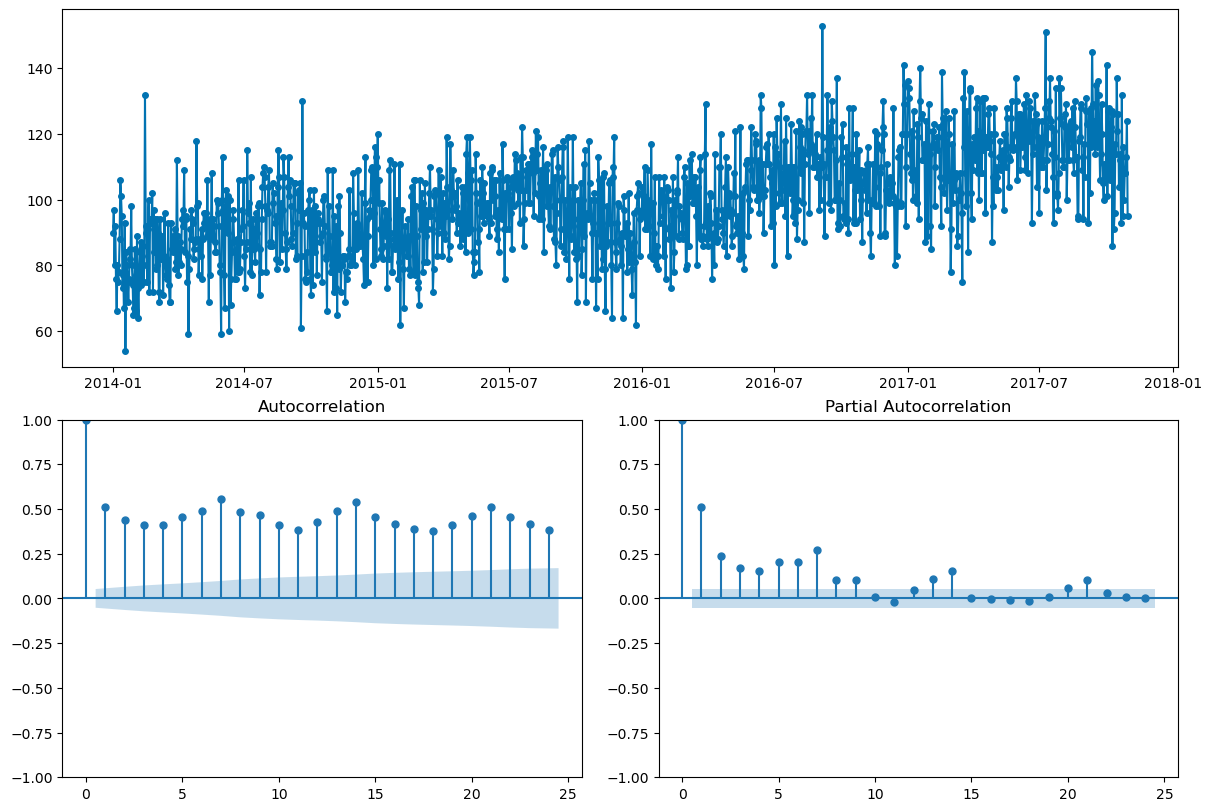

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sktime.utils.plotting import plot_correlations, plot_series

# load the dataset 
# insert own file path
file_path = '/Users/julian.olbinski/TU_block_4/Spatiotemporal_Analysis/Project/ed_time_series.csv'

ed_arrivals = pd.read_csv(file_path, header=0, index_col=0, parse_dates=True)

# Displaying dataset summaries
display(ed_arrivals.info())
display(ed_arrivals.describe())
display(ed_arrivals.head())
display(ed_arrivals.tail())


# Plot the dataset
ed_arrivals.plot()
plt.ylabel('No. of Arrivals')
plt.show()

# ACF & PACF plots
plot_correlations(ed_arrivals)

## Separating trend, seasonal and residual noise components

* examining the data with respect to 7, 30, and 365 day periodicities
* plotting the time series components


Text(0.5, 1.0, '365 Day Periodicity: Residuals, ACF, & PACF')

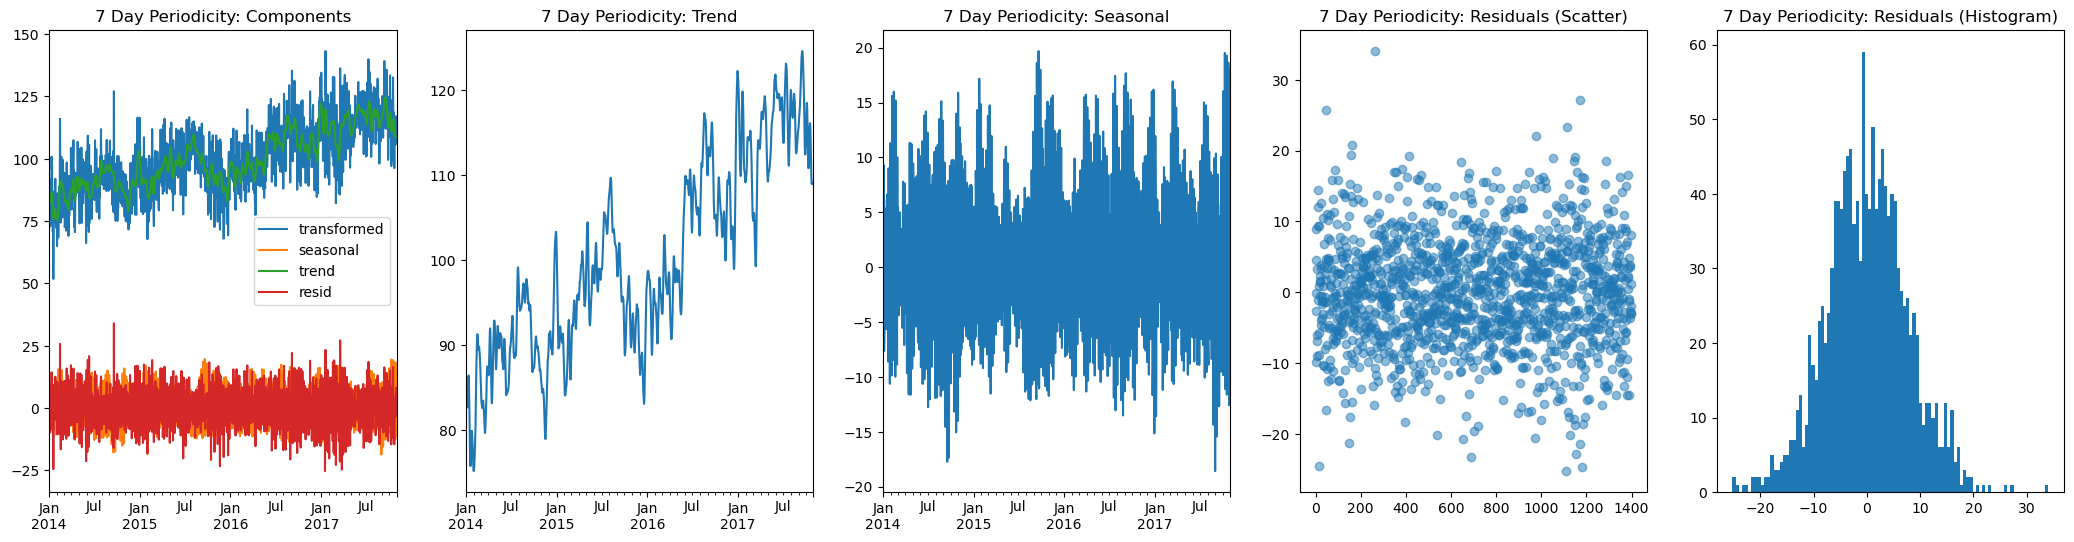

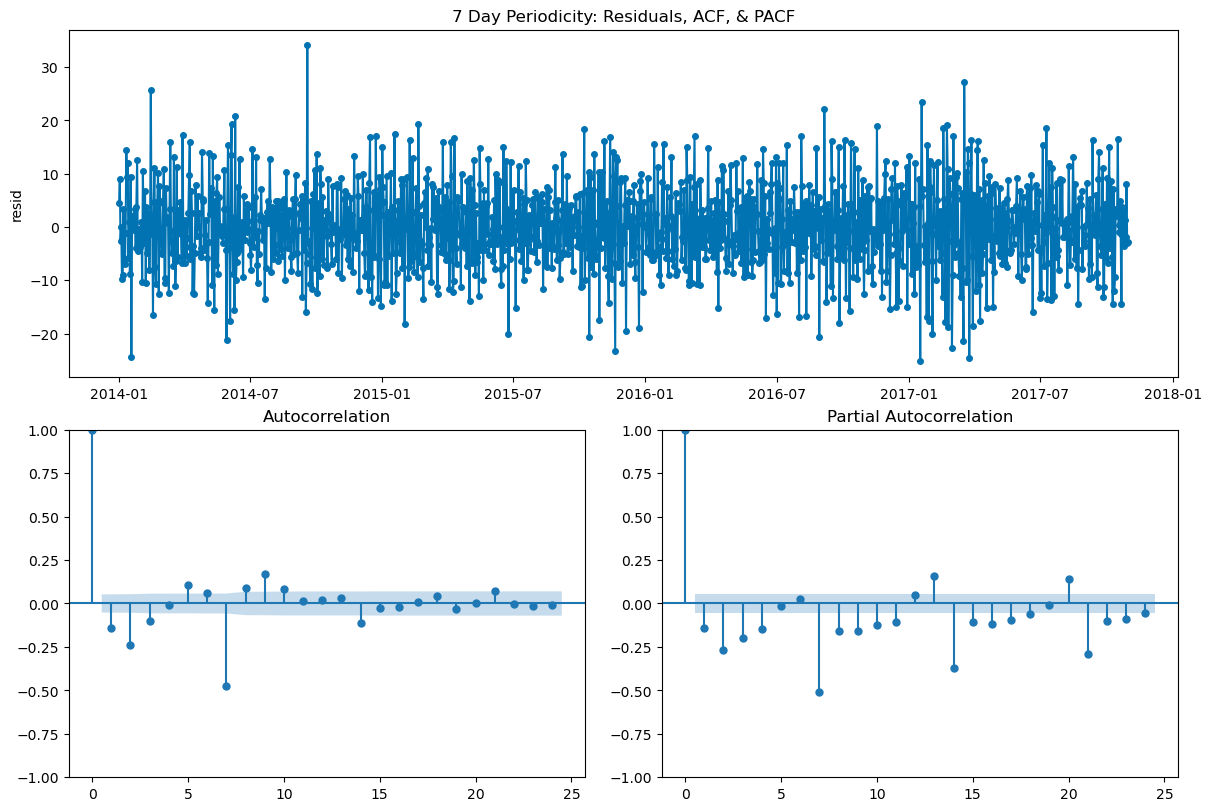

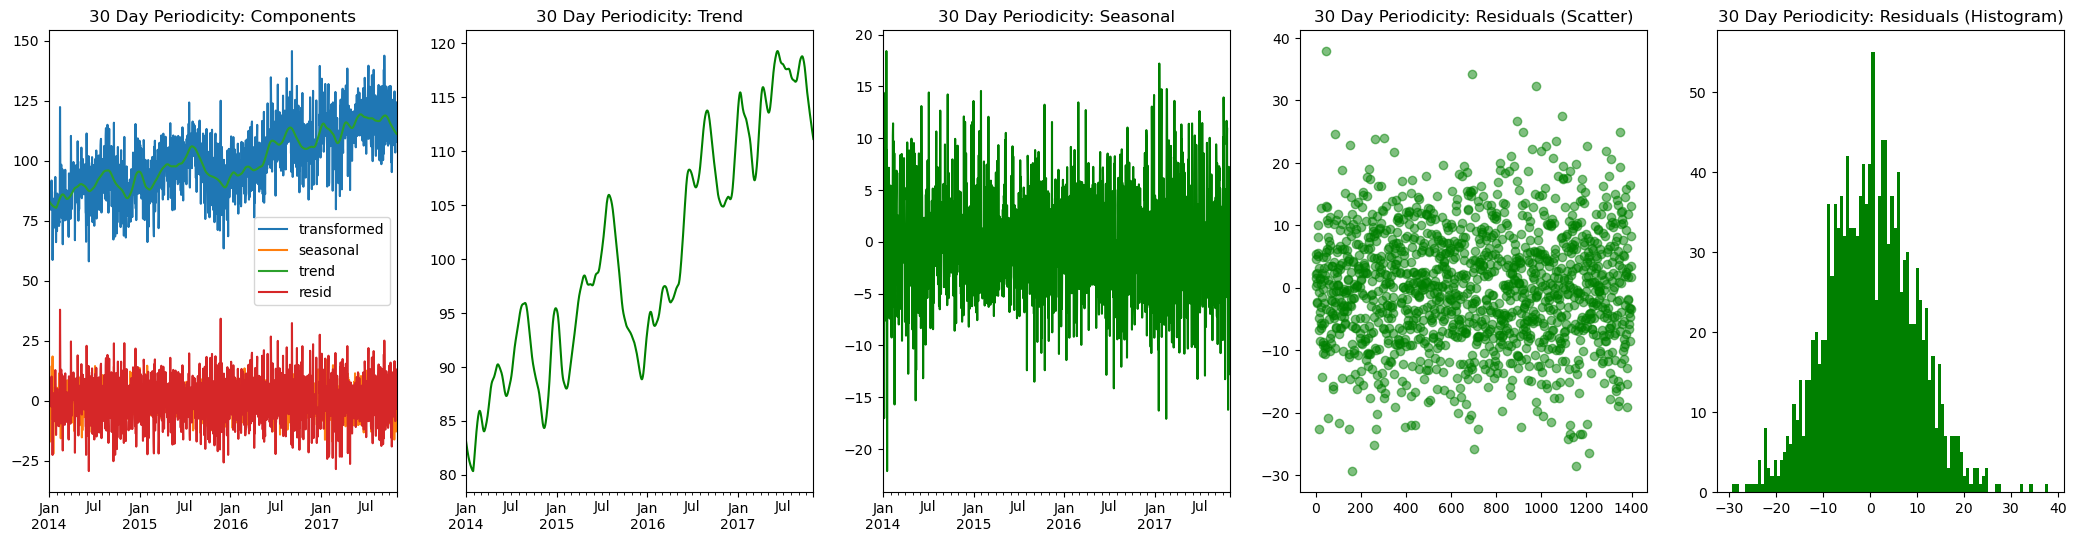

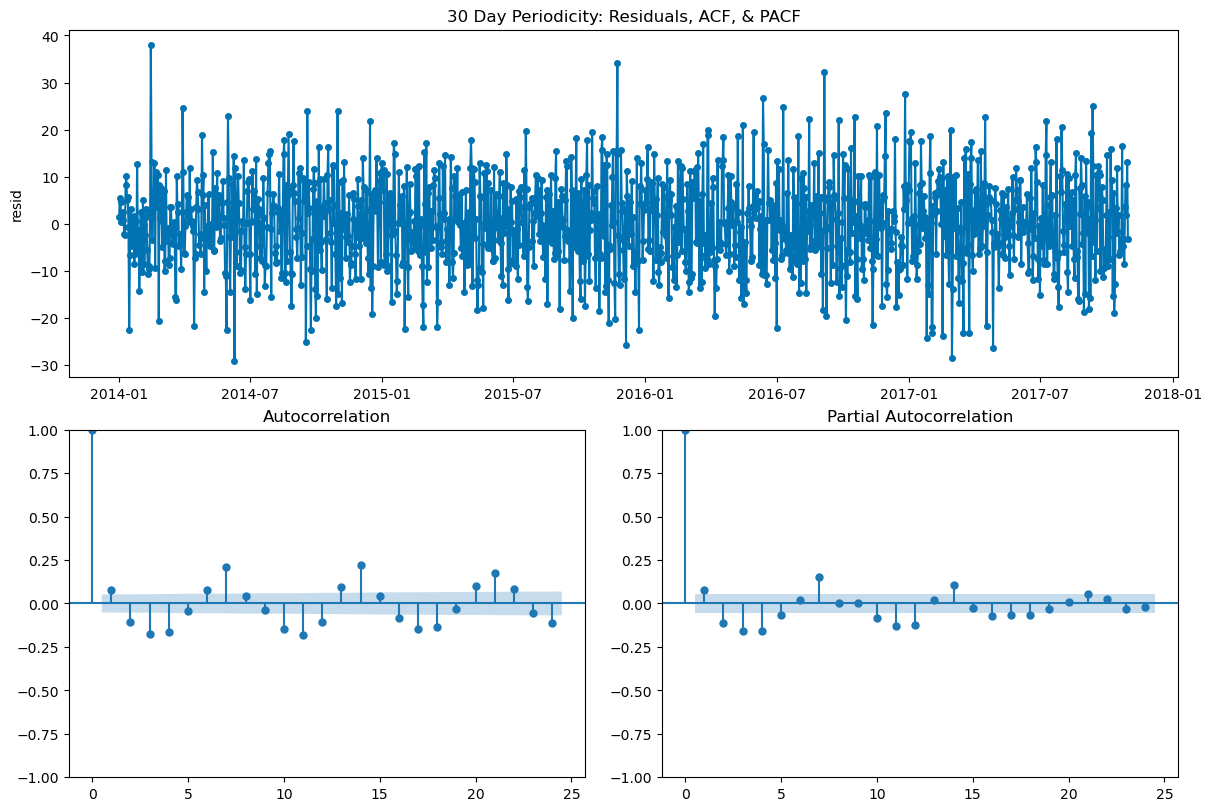

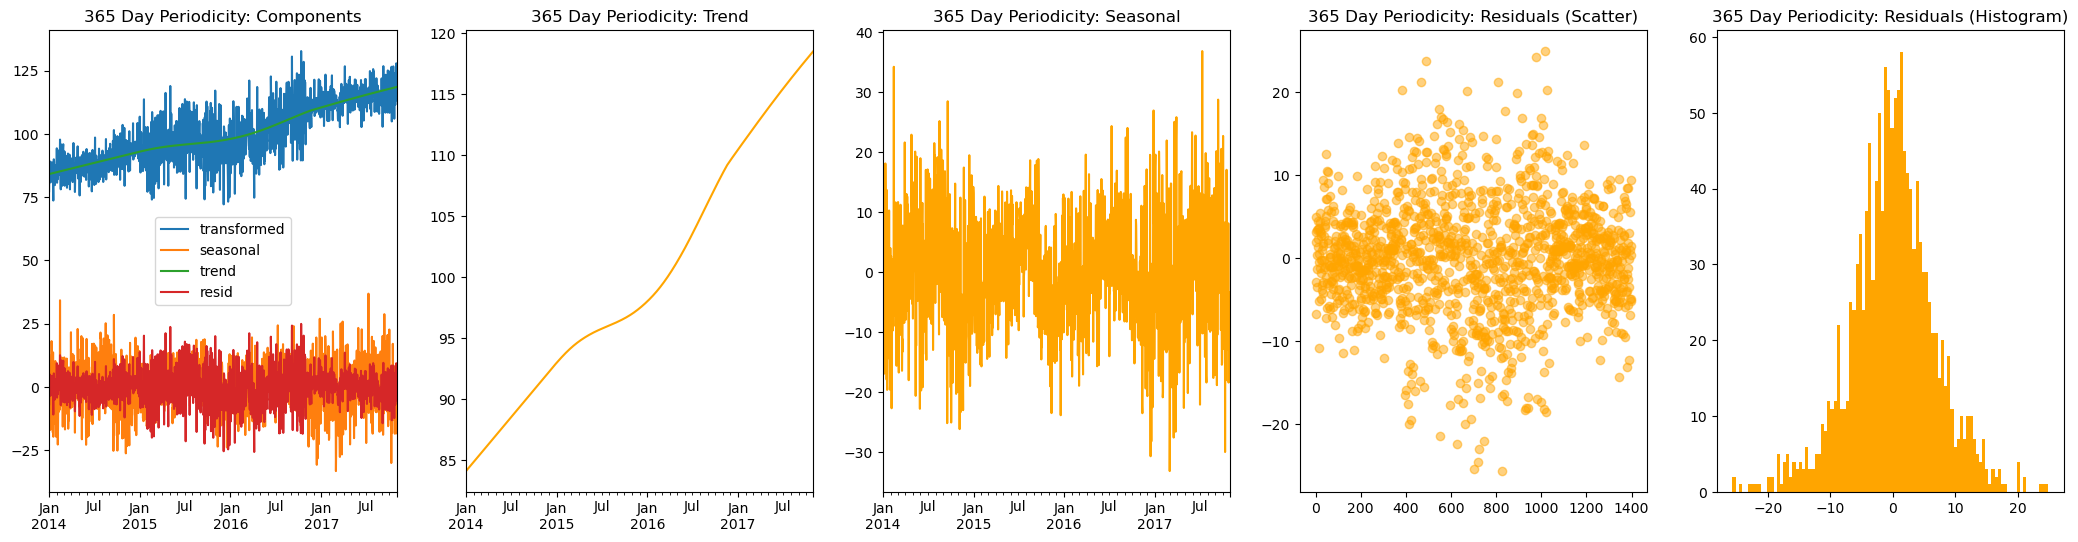

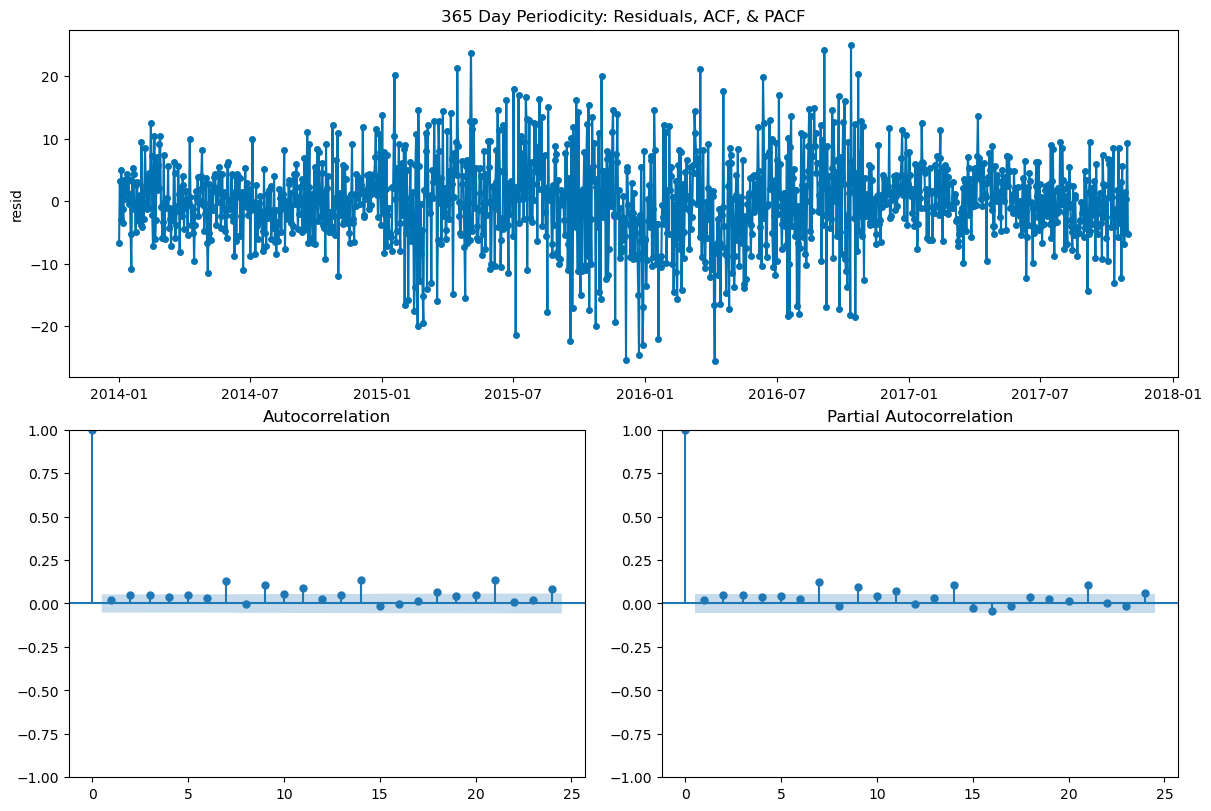

In [2]:
from sktime.transformations.series.detrend import STLTransformer

# Fit dataset to transformers with different periodicities

transformer_1 = STLTransformer(sp=7, return_components=True)
transformer_2 = STLTransformer(sp=30, return_components=True)
transformer_3 = STLTransformer(sp=365, return_components=True)

result_1 = transformer_1.fit_transform(ed_arrivals)
result_2 = transformer_2.fit_transform(ed_arrivals)
result_3 = transformer_3.fit_transform(ed_arrivals)


# Periodicity: 7 days

fig1, ax1 = plt.subplots(1,5, figsize=(26,6))

result_1.plot(ax=ax1[0])
result_1.trend.plot(ax=ax1[1])
result_1.seasonal.plot(ax=ax1[2])
ax1[3].scatter(range(len(result_1.resid)), result_1.resid, alpha=0.5)
ax1[4].hist(result_1.resid, bins=100)

ax1[0].set_title('7 Day Periodicity: Components')
ax1[1].set_title('7 Day Periodicity: Trend')
ax1[2].set_title('7 Day Periodicity: Seasonal')
ax1[3].set_title('7 Day Periodicity: Residuals (Scatter)')
ax1[4].set_title('7 Day Periodicity: Residuals (Histogram)')

fig, ax = plot_correlations(pd.Series(result_1.resid))
ax[0].set_title('7 Day Periodicity: Residuals, ACF, & PACF')


# Periodicity: 30 days

fig2, ax2 = plt.subplots(1,5, figsize=(26,6))

result_2.plot(ax=ax2[0])
result_2.trend.plot(ax=ax2[1], color='green')
result_2.seasonal.plot(ax=ax2[2], color='green')
ax2[3].scatter(range(len(result_2.resid)), result_2.resid, color='green', alpha=0.5)
ax2[4].hist(result_2.resid, bins=100, color='green')

ax2[0].set_title('30 Day Periodicity: Components')
ax2[1].set_title('30 Day Periodicity: Trend')
ax2[2].set_title('30 Day Periodicity: Seasonal')
ax2[3].set_title('30 Day Periodicity: Residuals (Scatter)')
ax2[4].set_title('30 Day Periodicity: Residuals (Histogram)')


fig, ax = plot_correlations(pd.Series(result_2.resid))
ax[0].set_title('30 Day Periodicity: Residuals, ACF, & PACF')


# Periodicity: 365 days

fig3, ax3 = plt.subplots(1,5, figsize=(26,6))

result_3.plot(ax=ax3[0])
result_3.trend.plot(ax=ax3[1], color='orange')
result_3.seasonal.plot(ax=ax3[2], color='orange')
ax3[3].scatter(range(len(result_3.resid)), result_3.resid, color='orange', alpha=0.5)
ax3[4].hist(result_3.resid, bins=100, color='orange')

ax3[0].set_title('365 Day Periodicity: Components')
ax3[1].set_title('365 Day Periodicity: Trend')
ax3[2].set_title('365 Day Periodicity: Seasonal')
ax3[3].set_title('365 Day Periodicity: Residuals (Scatter)')
ax3[4].set_title('365 Day Periodicity: Residuals (Histogram)')


fig, ax = plot_correlations(pd.Series(result_3.resid))
ax[0].set_title('365 Day Periodicity: Residuals, ACF, & PACF')


### Summary of observations thus far 


- An upward trend is clearly visible in all three periodicities analyzed. This was especially clear with the 365-day periodicity value, as the trend was smooth and consistently increasing rather sharply overtime. 

- Regarding seasonality, the 365-day periodicity seems to show a very slight sinusoidal pattern that appeared to repeat yearly (abscent in the other periodicities), however there is a great deal of noise so seasonality is likely not present. 

- The ACF/PACF plots for each periodicity show a strong autocorrelation at lag-7 (alternating negative and positive for each periodicity except 365 days). This suggests that there is a weekly cycle present in the data. 

- Finally, the there is much less variance in the 7-day residuals compared with 30-day, though both were normally distributed -- and the 365-day residuals had a high peak with very thin tails, in addition to showing heteroskedascticity, i.e, high variance in the center. Therefore, the 7-day periodicity is preferred.




## Fitting an Exponential Smoothing Model

* 7 and 30 day forecasting horizons
* evaluate prediction using mean absolute percentage error (MAPE)


MAPE for Exponential Smoothing 7 Day Forecast:  0.0827
MAPE for Exponential Smoothing 30 Day Forecast:  0.1163


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


(<Figure size 1600x400 with 1 Axes>,
 <Axes: title={'center': 'Exponential Smoothing Prediction: 30 days'}, ylabel='Arrivals'>)

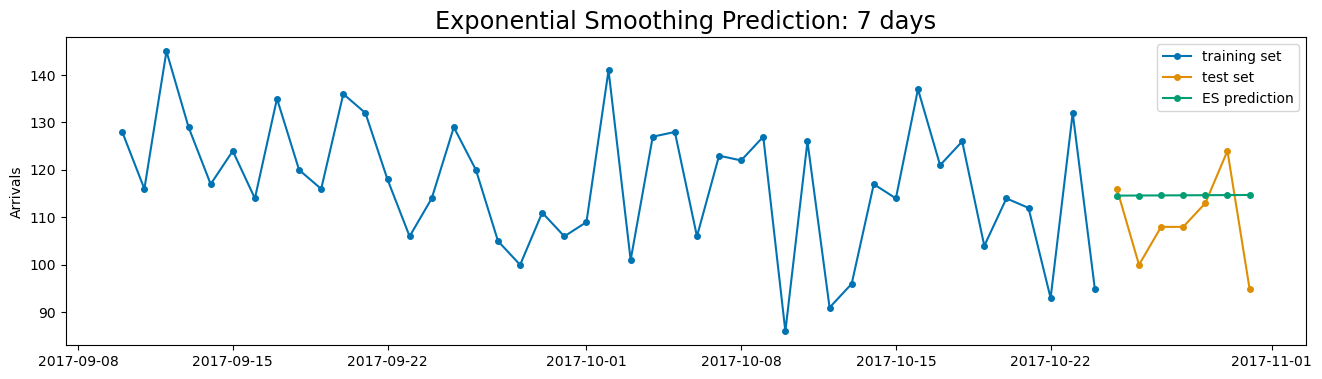

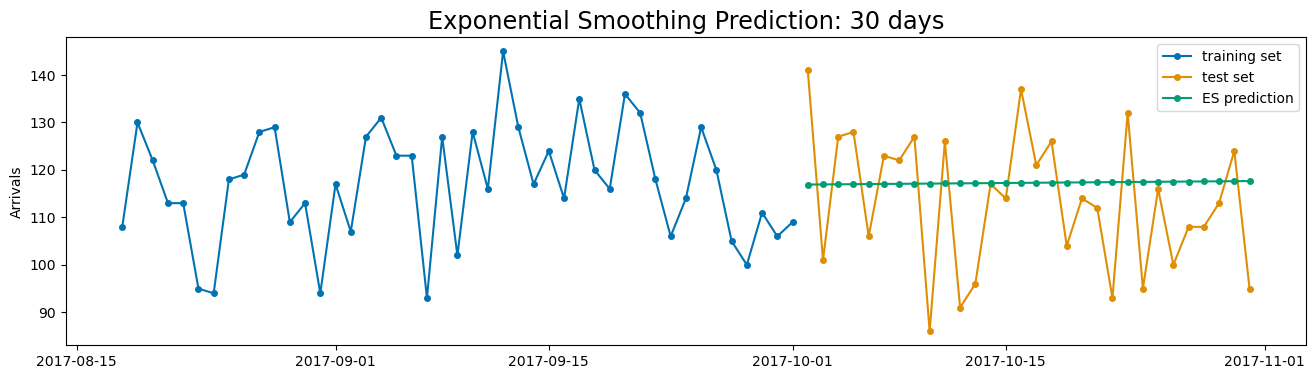

In [3]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.split import temporal_train_test_split

from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

# Train test split for 7 days and 30 days
ts1 = 7
ts2 = 30

# generate forecasting horizons
fh1 = np.arange(1, ts1+1)
fh2 = np.arange(1, ts2+1)

train1, test1 = temporal_train_test_split(ed_arrivals, test_size=ts1)
train2, test2 = temporal_train_test_split(ed_arrivals, test_size=ts2)

# Fit for fh of 7
ES = ExponentialSmoothing(trend='add', sp=7)       
ES.fit(train1)                                       
pred1 = ES.predict(fh=fh1)  


# Fit for fh of 30
ES = ExponentialSmoothing(trend='add', sp=7)         
ES.fit(train2)                                       
pred2 = ES.predict(fh=fh2)  


# Calculate MAPE
print('MAPE for Exponential Smoothing 7 Day Forecast: ', 
      mean_absolute_percentage_error(test1, pred1, symmetric=False).round(4))

print('MAPE for Exponential Smoothing 30 Day Forecast: ', 
      mean_absolute_percentage_error(test2, pred2, symmetric=False).round(4))


# Plot (including data only from 45 days ago onwards to not overwhelm)
plot_series(train1.iloc[-45:], test1, pred1,
            labels=["training set", "test set", "ES prediction"], 
            title = 'Exponential Smoothing Prediction: 7 days')

plot_series(train2.iloc[-45:], test2, pred2,
            labels=["training set", "test set", "ES prediction"], 
            title = 'Exponential Smoothing Prediction: 30 days')



## Fitting an ARIMA model (7-day periodicity)

- split data into train, validation, and test sets
- find the best parameters (p, d, q) using a for-loop on a set of possible parameter values
- use the AutoARIMA library to find the best parameters
- Fit the two models
- plot them and compare the performance using MAPE
  

In [4]:
import warnings
import sys
import os
from sktime.forecasting.arima import ARIMA, AutoARIMA


# Begin with 7-day periodicity
ts1 = 7
fh1 = np.arange(1, ts1+1)

#temporal train test split
train_big1, test1 = temporal_train_test_split(ed_arrivals, test_size=ts1)
train_small1, val1 = temporal_train_test_split(train_big1, test_size=ts1)

# Choosing ranges for the p, d, and q parameters
p_values = range(0,8)   # including up to 8, since we observed significant autocorrelation at lag 7
d_values = [0,1,2]      # included 1, since the dataset is not stationary
q_values = [0,1,2]

top_score1, best_config1 = float('inf'), None

''' 
I was getting needless FuutureWarnings, so I redirected stderr to suppress warnings 
'''

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    old_stderr = sys.stderr
    sys.stderr = open(os.devnull, 'w')  # suppress C-level warnings, since regularly ignoring warnings wasn't working
    try:
        for p in p_values:
            for d in d_values:
                for q in q_values:
                    try:
                        forecaster1 = ARIMA(order=(p,d,q), suppress_warnings=True)
                        forecaster1.fit(train_small1)
                        pred1 = forecaster1.predict(fh=fh1)

                        mape1 = mean_absolute_percentage_error(val1, pred1, symmetric=False).round(4)

                        if mape1 < top_score1:
                            top_score1, best_config1 = mape1, (p,d,q)
                            print(f'ARIMA{(p,d,q)} MAPE={mape1:.3f}')

                    except Exception:
                        continue
    finally:
        sys.stderr.close()
        sys.stderr = old_stderr  # restore stderr

print(f'Best ARIMA{best_config1} MAPE={top_score1:.3f}')


ARIMA(0, 0, 0) MAPE=0.121
ARIMA(0, 0, 1) MAPE=0.117
ARIMA(0, 0, 2) MAPE=0.107
ARIMA(1, 0, 0) MAPE=0.101
ARIMA(2, 0, 0) MAPE=0.095
Best ARIMA(2, 0, 0) MAPE=0.095


### Note:

- This is an odd result, given the weekly cycle we observed (i.e., autocorrelation at lags of multiples of 7), as well as the fact that the model is not stationary (i.e., likely needing to have d>= 1).



Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11594.095, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11325.634, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10852.917, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11592.095, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10841.149, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10839.759, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11212.952, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10832.186, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11144.364, Time=0.09 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=10818.442, Time=0.28 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=11054.937, Time=0.13 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=10817.449, Time=0.48 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=10978.782, Time=0.19 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=10818.519, Time=1.16 sec
 ARIMA(5,1,2)(0,0,0

(<Figure size 1600x400 with 1 Axes>,
 <Axes: title={'center': '7 Day Prediction: ARIMA Grid Search vs. AutoARIMA'}, ylabel='Arrivals'>)

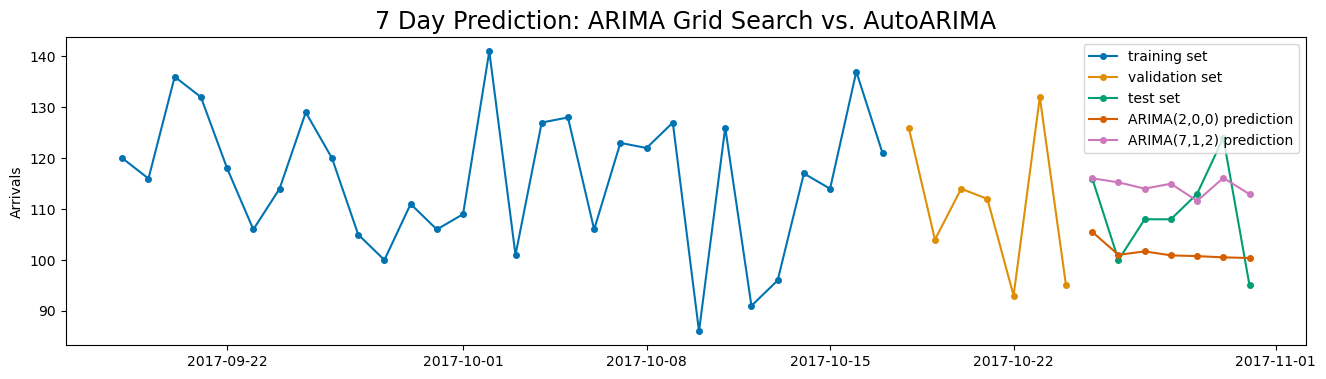

In [5]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    old_stderr = sys.stderr
    sys.stderr = open(os.devnull, 'w')  # suppress C-level warnings
    try:
        
        # Fit the "best" ARIMA model from the for-loop
        forecaster1 = ARIMA(order=best_config1, suppress_warnings=True)
        forecaster1.fit(train_big1)
        pred1 = forecaster1.predict(fh=fh1)
        mape1 = mean_absolute_percentage_error(test1, pred1, symmetric=False).round(4)

        # Fit AutoARIMA
        auto_forecaster1 = AutoARIMA(start_p=0, start_q=0,
                                     max_p=7, max_d=2, max_q=2,
                                     suppress_warnings=True, trace=True)  
        auto_forecaster1.fit(train_big1)
        auto_pred1 = auto_forecaster1.predict(fh1)
        auto_mape1 = mean_absolute_percentage_error(test1, auto_pred1, symmetric=False).round(4)
    finally:
        sys.stderr.close()
        sys.stderr = old_stderr  # restore stderr

# Print Results
print('\n')
print('AutoARIMA Model MAPE:', auto_mape1)
print('For-Loop Model MAPE :', mape1)
print('\n')

# Plot predictions 
plot_series(train_small1[-30:], val1, test1, pred1, auto_pred1,
            labels=['training set','validation set','test set','ARIMA(2,0,0) prediction','ARIMA(7,1,2) prediction'],
            title='7 Day Prediction: ARIMA Grid Search vs. AutoARIMA')



## Note:
Here we see that AutoARIMA selected (7,1,2) as the parameters, and that it gave a better prediction than ARIMA(2,0,0), as evidenced by the lower MAPE value.

## Fitting an ARIMA model (30-day periodicity)

- split data into train, validation, and test sets
- find the best parameters (p, d, q) using a for-loop on a set of possible parameter values
- use the AutoARIMA library to find the best parameters
- Fit the two models and compare the performance using MAPE
  

In [6]:

# And now 30-day periodicity
ts2 = 30
fh2 = np.arange(1, ts2+1)

train_big2, test2 = temporal_train_test_split(ed_arrivals, test_size=ts2)
train_small2, val2 = temporal_train_test_split(train_big2, test_size=ts2)

# Choose the same parameter ranges
p_values = range(0,8)
d_values = [0,1,2]
q_values = [0,1,2]

top_score2, best_config2 = float('inf'), None

# Same for-loop
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    old_stderr = sys.stderr
    sys.stderr = open(os.devnull, 'w')  # suppress C-level warnings, since regularly ignoring warnings wasn't working
    try:
        for p in p_values:
            for d in d_values:
                for q in q_values:
                    
                    arima_order2= (p,d,q)
                    try:
                        forecaster2 = ARIMA(order=arima_order2, suppress_warnings=True)
                        forecaster2.fit(train_small2)
                        pred2 = forecaster2.predict(fh=fh2)
        
                        mape2 = mean_absolute_percentage_error(val2, pred2, symmetric=False).round(4)
                        
                        if mape2 < top_score2:
        
                            top_score2, best_config2 = mape2, arima_order2
                            print('ARIMA%s MAPE=%.3f' % (arima_order2,mape2))
                            
                    except Exception:
                        continue
    finally:
        sys.stderr.close()
        sys.stderr = old_stderr  # restore stderr


print('Best ARIMA%s MAPE=%.3f' % (best_config2, top_score2))


ARIMA(0, 0, 0) MAPE=0.159
ARIMA(0, 0, 1) MAPE=0.157
ARIMA(0, 0, 2) MAPE=0.156
ARIMA(0, 1, 0) MAPE=0.084
Best ARIMA(0, 1, 0) MAPE=0.084


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11368.398, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11119.364, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10656.447, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11366.399, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10641.389, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10638.670, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11008.279, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10630.731, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=10935.529, Time=0.08 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=10619.260, Time=0.29 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=10848.131, Time=0.13 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=10618.039, Time=0.50 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=10770.616, Time=0.19 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=10617.943, Time=0.72 sec
 ARIMA(6,1,0)(0,0,0

(<Figure size 1600x400 with 1 Axes>,
 <Axes: title={'center': '30 Day Prediction: ARIMA Grid Search vs. AutoARIMA'}, ylabel='Arrivals'>)

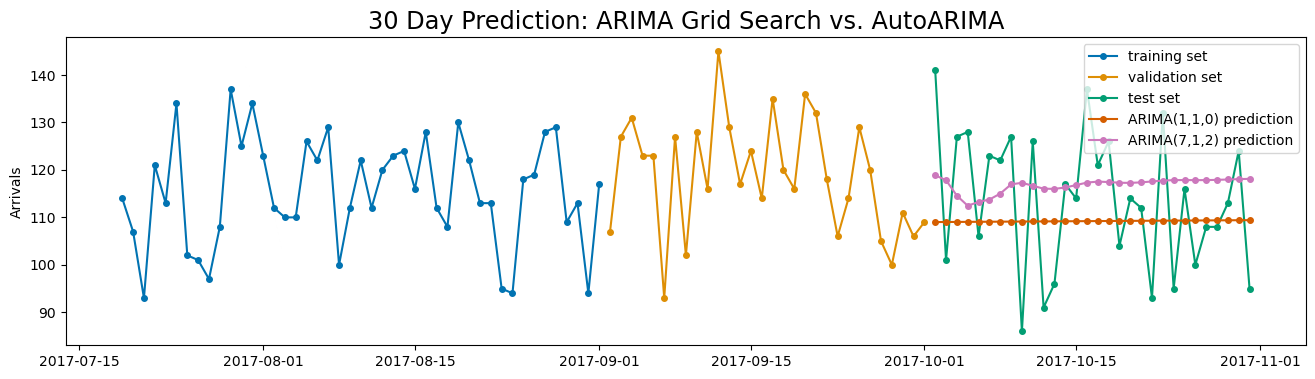

In [7]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    old_stderr = sys.stderr
    sys.stderr = open(os.devnull, 'w')  
    try:
        
        # Fit the "best" ARIMA model on the large training set
        forecaster2=ARIMA(order=best_config2, suppress_warnings=True)
        forecaster2.fit(train_big2)
        pred2 = forecaster2.predict(fh=fh2)
        mape2 = mean_absolute_percentage_error(test2, pred2, symmetric=False).round(4)
        
        
        # Now try out AutoArima and compare to the for loop
        auto_forecaster2 = AutoARIMA(start_p=0, start_q=0,
                                max_p=7, max_d=2, max_q=2,
                                suppress_warnings=True, trace=True)
        auto_forecaster2.fit(train_big2)
        auto_pred2 = auto_forecaster2.predict(fh2)
        auto_mape2 = mean_absolute_percentage_error(test2, auto_pred2, symmetric=False).round(4)
    finally:
        sys.stderr.close()
        sys.stderr = old_stderr 

print('\n')
print('AutoARIMA Model MAPE:',auto_mape2)
print('Model MAPE:',mape2)
print('\n')


plot_series(train_small2[-45:], val2, test2, pred2, auto_pred2,
           labels=['training set','validation set','test set','ARIMA(1,1,0) prediction','ARIMA(7,1,2) prediction'],
           title='30 Day Prediction: ARIMA Grid Search vs. AutoARIMA')



### Results:

* Here we see that AutoARIMA again chose (7,1,2), since it was likely picking up on the 7-day cycle, as well as on the fact that the dataset is not stationary.
* However, its MAPE score is marginally worse than the model chosen by the for-loop.
* Also, it is somewhat odd that a different ARIMA model was chosen by the for-loop for a fh of 30 than for a fh of 7, since the difference in the size of the test set is marginal. 


# Exploring more sophisticated models 

## KNN Regressor (7 & 30 day periodicity)


- Define a function to do train test split for TS regression
- split data using 7-day and 30-day test sizes
- check the shapes of the resulting sets to see if they will work correctly 

In [8]:
# Define a function that generates train test split for TS regression
def regression_train_test_split(data, in_num, fh):

    train, test = data[:-fh], data[-(fh + in_num) :]
    x_train, y_train = train[:-1], np.roll(train, -in_num)[:-in_num]
    x_test, y_test = test[:-1], np.roll(test, -in_num)[:-in_num]

    # reshape input to be [samples, time steps, features]
    # (N-NF samples, 1 time step, 1 feature)
    x_train = np.reshape(x_train, (-1, 1))
    x_test = np.reshape(x_test, (-1, 1))
    temp_test = np.roll(x_test, -1)
    temp_train = np.roll(x_train, -1)
    for _ in range(1, in_num):
        x_train = np.concatenate((x_train[:-1], temp_train[:-1]), 1)
        x_test = np.concatenate((x_test[:-1], temp_test[:-1]), 1)
        temp_test = np.roll(temp_test, -1)[:-1]
        temp_train = np.roll(temp_train, -1)[:-1]

    return x_train, y_train, x_test, y_test


# Split the data
fh1=7
fh2=30

x_train1, y_train1, x_test1, y_test1 = regression_train_test_split(ed_arrivals, 30, fh1)
x_train2, y_train2, x_test2, y_test2 = regression_train_test_split(ed_arrivals, 30, fh2)


# Check the split
print('\t 7-day train-test set shapes:')
print('\t \t x_train shape:',x_train1.shape, '\n'
      '\t \t y_train shape:', y_train1.shape,'\n'
      '\t \t x_test shape:', x_test1.shape, '\n'
      '\t \t y_test shape:', y_test1.shape
     )

print('\n')

print('\t 30-day train-test set shapes:')
print('\t \t x_train shape:',x_train2.shape, '\n'
      '\t \t y_train shape:', y_train2.shape,'\n'
      '\t \t x_test shape:', x_test2.shape, '\n'
      '\t \t y_test shape:', y_test2.shape
     )



	 7-day train-test set shapes:
	 	 x_train shape: (1363, 30) 
	 	 y_train shape: (1363, 1) 
	 	 x_test shape: (7, 30) 
	 	 y_test shape: (7, 1)


	 30-day train-test set shapes:
	 	 x_train shape: (1340, 30) 
	 	 y_train shape: (1340, 1) 
	 	 x_test shape: (30, 30) 
	 	 y_test shape: (30, 1)


- Gridsearch for best KNN params
- do for both 7-day and 30-day splits

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_regressor = KNeighborsRegressor()

# Gridsearch for first train/test set size
param_grid = {'n_neighbors':range(1,101)} 
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5)
grid_search.fit(x_train1, y_train1)
print("Best params (7-day test):", grid_search.best_params_)

# Another Gridsearch for the (slightly) different training/test set size
param_grid = {'n_neighbors':range(1,101)}
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5)
grid_search.fit(x_train2, y_train2)
print("Best params (30-day test):", grid_search.best_params_)


Best params (7-day test): {'n_neighbors': 26}
Best params (30-day test): {'n_neighbors': 28}


- fit a KNN regressor for 7-day and 30-day splits
- create segments of the data to use for plotting


In [10]:
# fitting KNN for predictions (7-day test and 30-day test size)

knn_regressor1 = KNeighborsRegressor(n_neighbors=26)
forecaster1 = knn_regressor1.fit(x_train1, y_train1)
y_pred1_knn = forecaster1.predict(x_test1)

knn_regressor2 = KNeighborsRegressor(n_neighbors=28)
forecaster2 = knn_regressor2.fit(x_train2, y_train2)
y_pred2_knn = forecaster2.predict(x_test2)


In [11]:
'''
    The below was done to make plotting much easier
'''

len_train1 = len(y_train1)
len_train2 = len(y_train2)

len_test1 = len(y_test1)
len_test2 = len(y_test2)

len_total = len_train1 + len_test1 


# making the train/prediction segments for the plot 
# (i.e., last 60 observations of the training set to be plotted so as to not overwhelm the plot)
train_segment1 = range(len_train1)[-60:]
train_segment2 = range(len_train2)[-60:]

pred_segment1 = range(len_total)[-len_test1 :]
pred_segment2 = range(len_total)[-len_test2 :]


# checking if they're correct
print(train_segment1)
print(train_segment2)

print(pred_segment1)
print(pred_segment2)


range(1303, 1363)
range(1280, 1340)
range(1363, 1370)
range(1340, 1370)


- Plotting the results of the KNN regressor

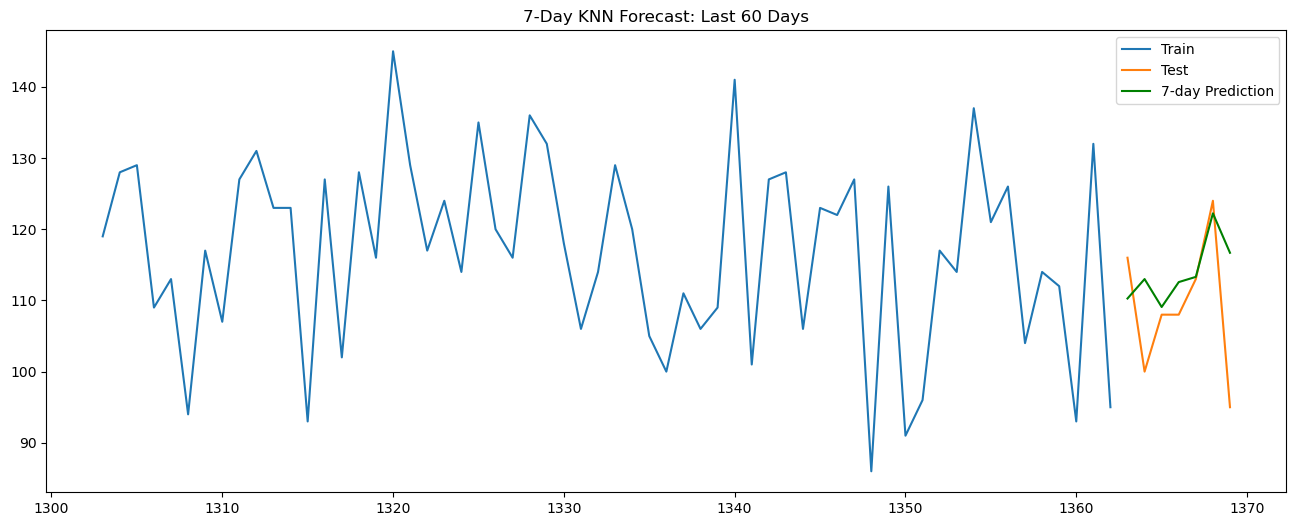

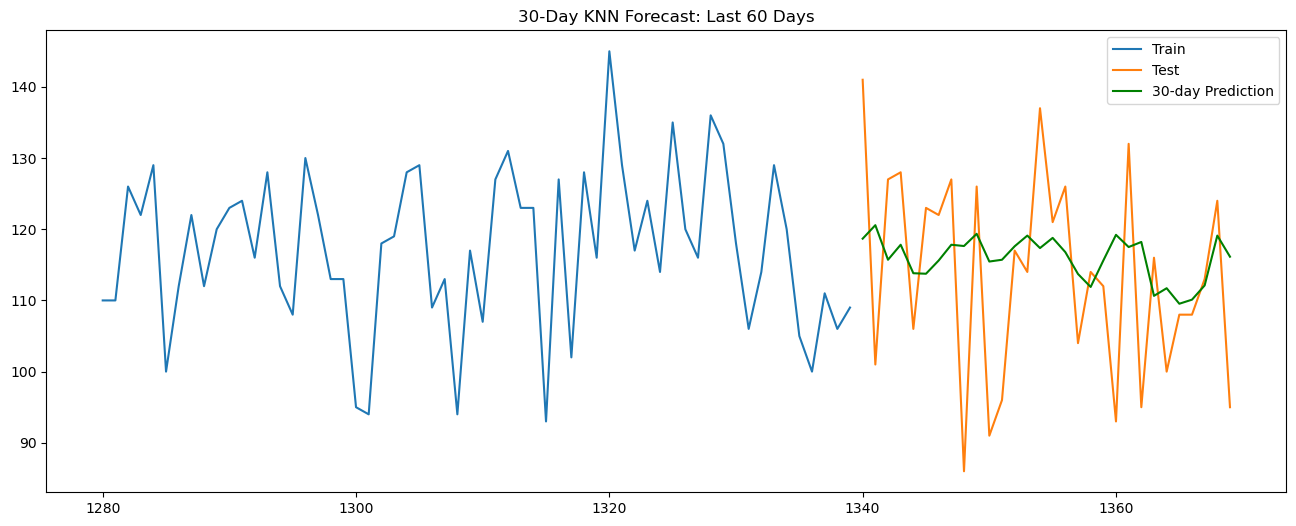

7 Day MAPE (KNN): 0.0682
30 Day MAPE (KNN): 0.1074


In [12]:

# 7-day forecast plot
plt.figure(figsize=(16, 6))
plt.plot(train_segment1, y_train1[-60:], label='Train')
plt.plot(pred_segment1, y_test1, label='Test')
plt.plot(pred_segment1, y_pred1_knn, label='7-day Prediction', color='green')
plt.legend()
plt.title('7-Day KNN Forecast: Last 60 Days')

# 30-day forecast plot
plt.figure(figsize=(16, 6))
plt.plot(train_segment2, y_train2[-60:], label='Train')
plt.plot(pred_segment2, y_test2, label='Test')
plt.plot(pred_segment2, y_pred2_knn, label='30-day Prediction', color='green')
plt.legend()
plt.title('30-Day KNN Forecast: Last 60 Days')

plt.show()

knn_mape_7_day = mean_absolute_percentage_error(y_test1, y_pred1_knn)
knn_mape_30_day = mean_absolute_percentage_error(y_test2, y_pred2_knn)

print('7 Day MAPE (KNN):', knn_mape_7_day.round(4))
print('30 Day MAPE (KNN):', knn_mape_30_day.round(4))



##### As we can see, predictions were consistently better for a 7 day forecast than for 30 days. Additionally, the 30-day train split performed better overall

## XGBoost Regressor (7 & 30 day periodicity)


In [13]:
from xgboost import XGBRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


seed=123

xgb_regressor= XGBRegressor(random_state=seed)

param_grid = {'learning_rate': [0.01, 0.05, 0.1],
              'max_depth': [3,5],
              'n_estimators': [200,300,400],
              'subsample':[0.8],
              'colsample_bytree':[0.6, 0.8],
              'reg_lambda':[1, 3, 5],
              'gamma': [0.1, 0.2],
              'min_child_weight': [1, 3, 5]
             }

# perform grid search for best params
grid_search = GridSearchCV(xgb_regressor, param_grid, 
                           n_jobs = -1, cv=5)

grid_search.fit(x_train1, y_train1)
xgb_top1 = grid_search.best_estimator_              
print("Best params (7-day test):", xgb_top1)

grid_search.fit(x_train2, y_train2)
xgb_top2 = grid_search.best_estimator_              
print("Best params (30-day test):", xgb_top2)



Best params (7-day test): XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=None, num_parallel_tree=None, ...)
Best params (30-day test): XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
          

In [14]:
# Fitting the models

forecaster1 = xgb_top1.fit(x_train1, y_train1)
y_pred1_xgb = forecaster1.predict(x_test1)

forecaster2 = xgb_top2.fit(x_train2, y_train2)
y_pred2_xgb = forecaster2.predict(x_test2)

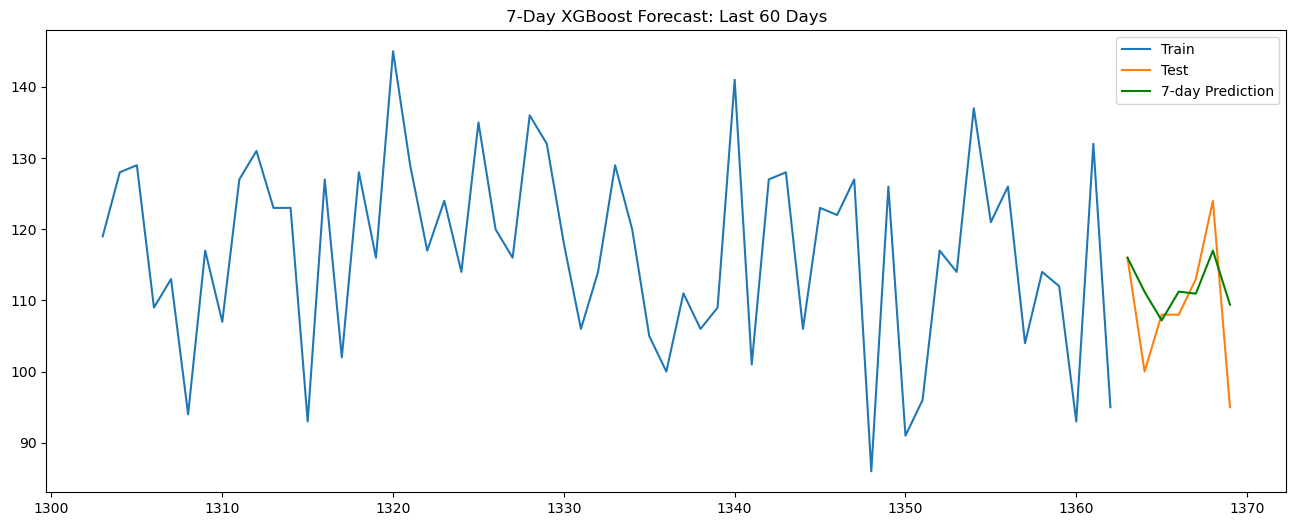

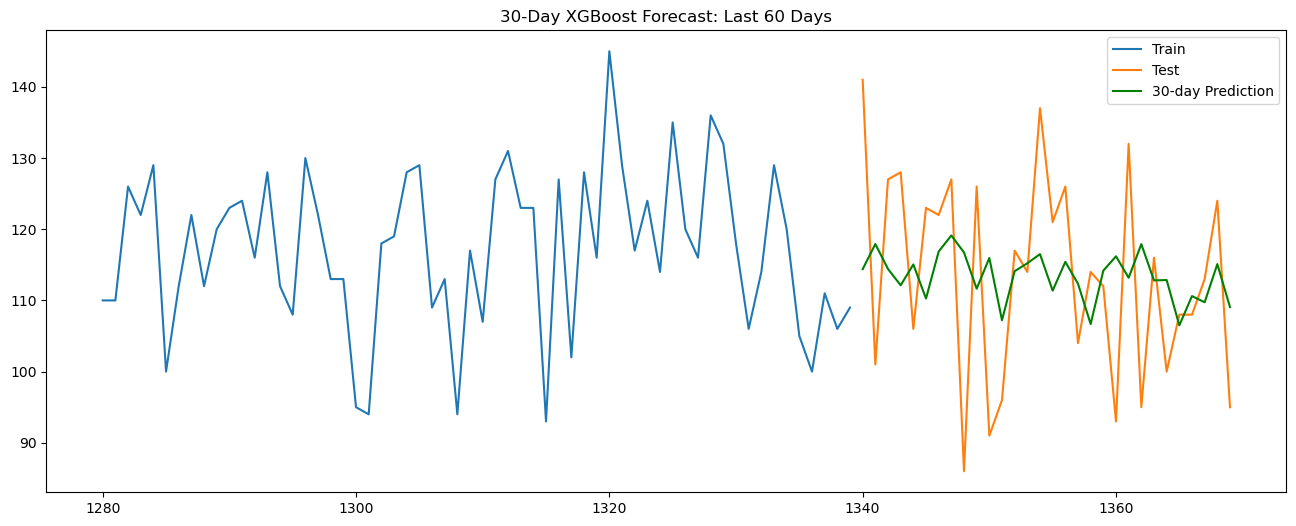

7 Day MAPE (XGBoost): 0.0537
30 Day MAPE (XGBoost): 0.1108


In [15]:
# Plotting the two

# 7-day forecast plot
plt.figure(figsize=(16, 6))
plt.plot(train_segment1, y_train1[-60:], label='Train')
plt.plot(pred_segment1, y_test1, label='Test')
plt.plot(pred_segment1, y_pred1_xgb, label='7-day Prediction', color='green')
plt.legend()
plt.title('7-Day XGBoost Forecast: Last 60 Days')

# 30-day forecast plot

plt.figure(figsize=(16, 6))
plt.plot(train_segment2, y_train2[-60:], label='Train')
plt.plot(pred_segment2, y_test2, label='Test')
plt.plot(pred_segment2, y_pred2_xgb, label='30-day Prediction', color='green')
plt.legend()
plt.title('30-Day XGBoost Forecast: Last 60 Days')

plt.show()

xgb_mape_7_day = mean_absolute_percentage_error(y_test1, y_pred1_xgb)
xgb_mape_30_day = mean_absolute_percentage_error(y_test2, y_pred2_xgb)

print('7 Day MAPE (XGBoost):', xgb_mape_7_day.round(4))
print('30 Day MAPE (XGBoost):', xgb_mape_30_day.round(4))

# Comparing the models

- creating a function to order models in terms of lowest MAPE

In [16]:
# Ranking the best models in terms of lowest MAPE
def create_ranking_df(model_names, mape_values):

    df = pd.DataFrame({'Model': model_names, 'MAPE': mape_values})
    df = df.sort_values('MAPE').reset_index(drop=True)
    df['Rank'] = df.index + 1
    
    return df[['Rank', 'Model', 'MAPE']]

## 7-day predictions

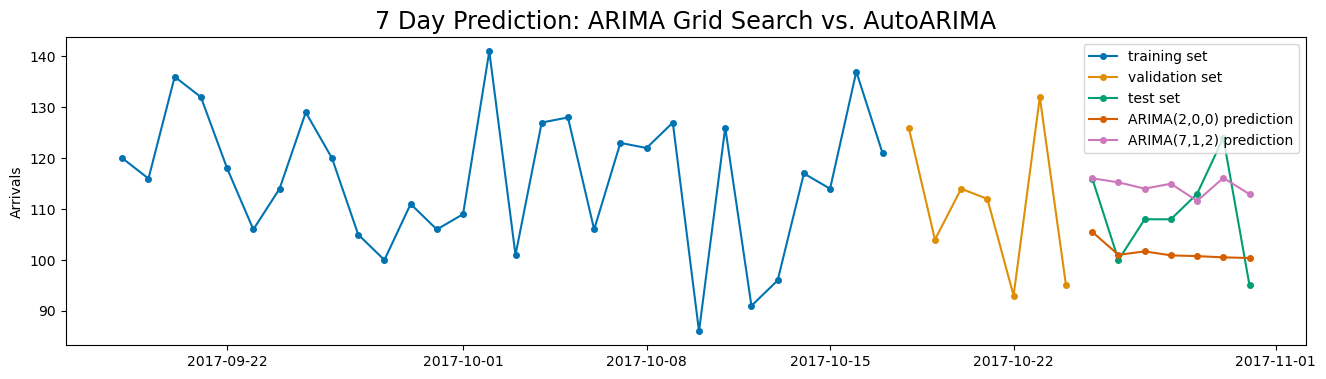

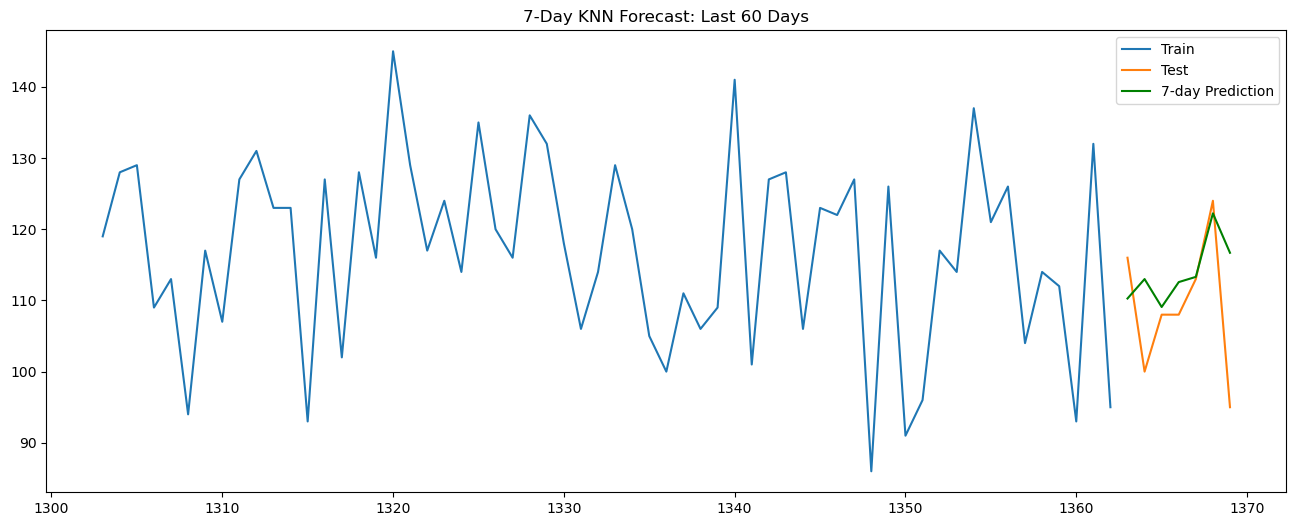

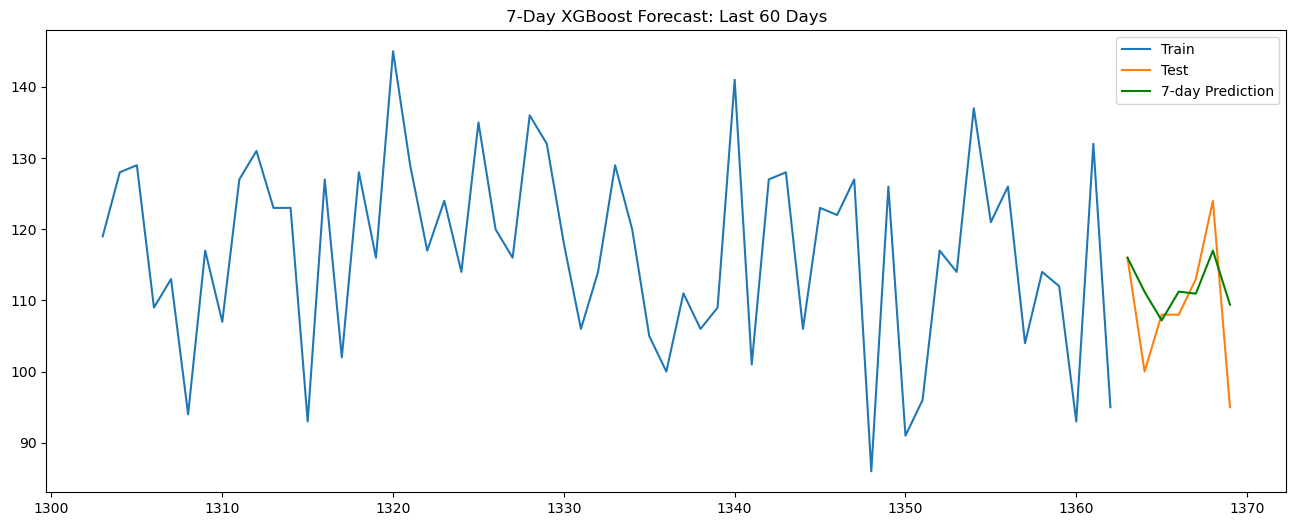

7-Day Rankings:
 Rank             Model     MAPE
    1           XGBoost 0.053682
    2               KNN 0.068155
    3 AutoARIMA (7,1,2) 0.076800
    4     ARIMA (2,0,0) 0.082700


In [17]:

# ARIMA and AutoARIMA
plot_series(train_small1[-30:], val1, test1, pred1, auto_pred1,
            labels=['training set','validation set','test set','ARIMA(2,0,0) prediction','ARIMA(7,1,2) prediction'],
            title='7 Day Prediction: ARIMA Grid Search vs. AutoARIMA')

# KNN
plt.figure(figsize=(16, 6))
plt.plot(train_segment1, y_train1[-60:], label='Train')
plt.plot(pred_segment1, y_test1, label='Test')
plt.plot(pred_segment1, y_pred1_knn, label='7-day Prediction', color='green')
plt.legend()
plt.title('7-Day KNN Forecast: Last 60 Days')


# XGBoost
plt.figure(figsize=(16, 6))
plt.plot(train_segment1, y_train1[-60:], label='Train')
plt.plot(pred_segment1, y_test1, label='Test')
plt.plot(pred_segment1, y_pred1_xgb, label='7-day Prediction', color='green')
plt.legend()
plt.title('7-Day XGBoost Forecast: Last 60 Days')

plt.show()


model_names_7_day = ['ARIMA (2,0,0)', 'AutoARIMA (7,1,2)', 'KNN', 'XGBoost']
mape_values_7_day = [mape1, auto_mape1, knn_mape_7_day, xgb_mape_7_day]

df_7_day = create_ranking_df(model_names_7_day, mape_values_7_day)
print("7-Day Rankings:")
print(df_7_day.to_string(index=False))


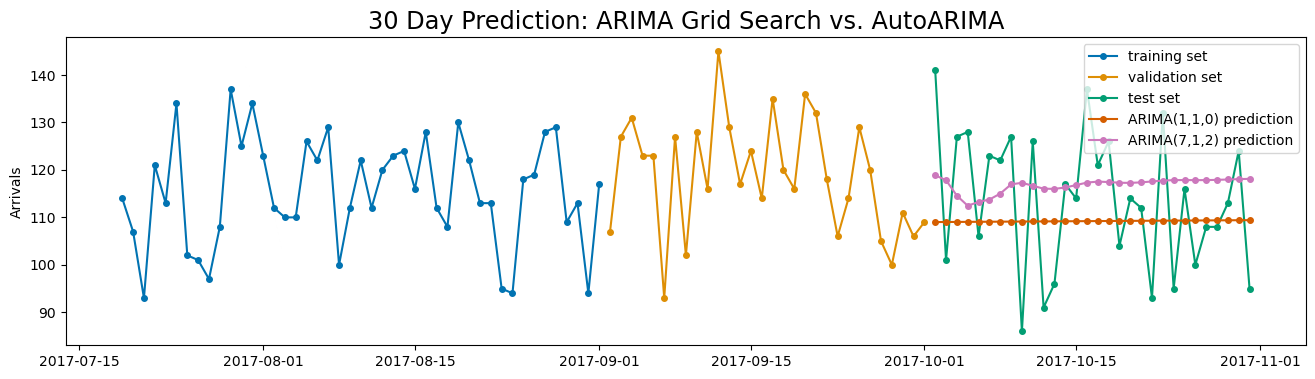

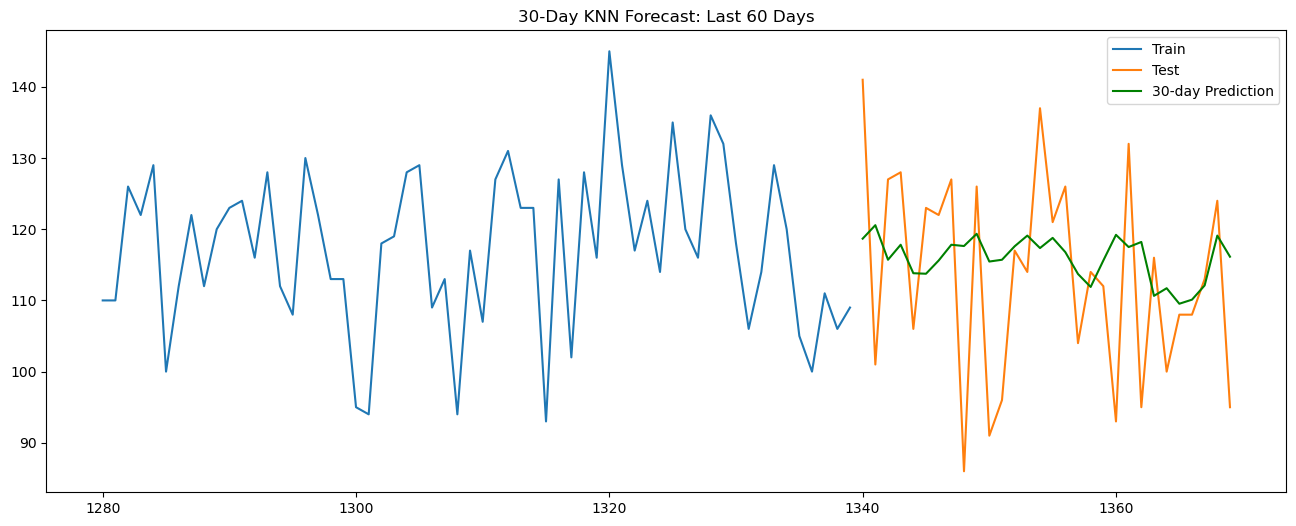

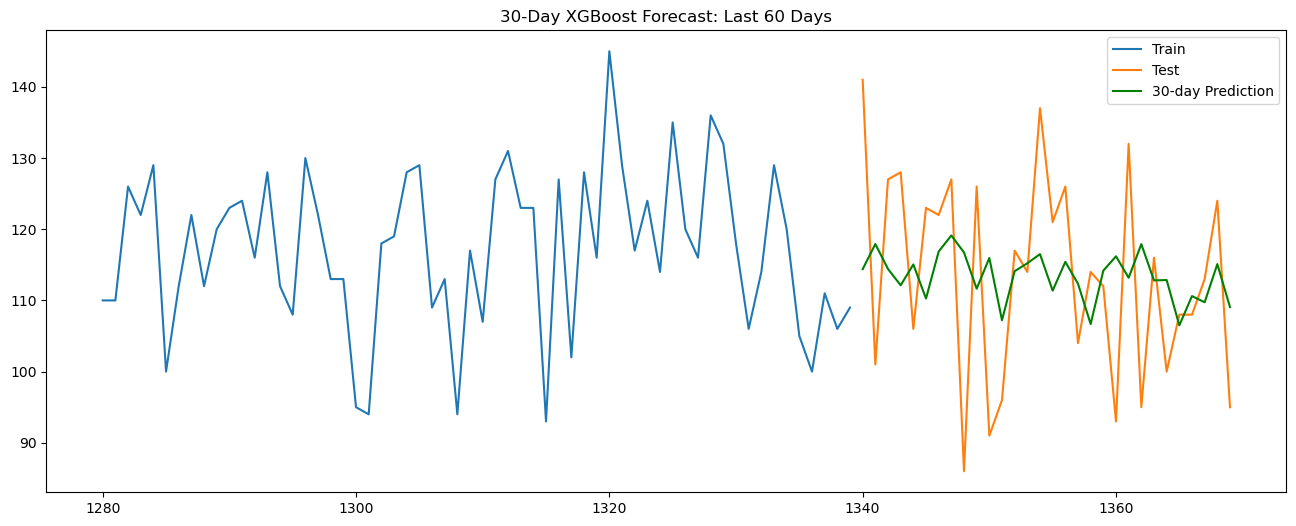

30-Day Rankings:
 Rank             Model     MAPE
    1               KNN 0.107365
    2           XGBoost 0.110777
    3     ARIMA (1,1,0) 0.111900
    4 AutoARIMA (7,1,2) 0.118200


In [18]:
# ARIMA and AutoARIMA
plot_series(train_small2[-45:], val2, test2, pred2, auto_pred2,
           labels=['training set','validation set','test set','ARIMA(1,1,0) prediction','ARIMA(7,1,2) prediction'],
           title='30 Day Prediction: ARIMA Grid Search vs. AutoARIMA')

# KNN
plt.figure(figsize=(16, 6))
plt.plot(train_segment2, y_train2[-60:], label='Train')
plt.plot(pred_segment2, y_test2, label='Test')
plt.plot(pred_segment2, y_pred2_knn, label='30-day Prediction', color='green')
plt.legend()
plt.title('30-Day KNN Forecast: Last 60 Days')

# XGBoost
plt.figure(figsize=(16, 6))
plt.plot(train_segment2, y_train2[-60:], label='Train')
plt.plot(pred_segment2, y_test2, label='Test')
plt.plot(pred_segment2, y_pred2_xgb, label='30-day Prediction', color='green')
plt.legend()
plt.title('30-Day XGBoost Forecast: Last 60 Days')

plt.show()

model_names_30_day = ['ARIMA (1,1,0)', 'AutoARIMA (7,1,2)', 'KNN', 'XGBoost']
mape_values_30_day = [mape2, auto_mape2, knn_mape_30_day, xgb_mape_30_day]

df_30_day = create_ranking_df(model_names_30_day, mape_values_30_day)
print("30-Day Rankings:")
print(df_30_day.to_string(index=False))